# Sprint

La siguiente entrega tiene como objetivo poder evaluar los conocimientos adquiridos durante el transcurso del módulo de **Aprendizaje no supervisado**.

Para ello evaluaremos dos aspectos principales:

- Conocimientos fundamentales sobre agrupamiento, redes generativas, y autoencoders
- Ejercicios que permitan evaluar la implementación de código

>Note: Aquellos ejercicios teóricos, mantener la respuesta en formato Markdown

# Ejercicio 1 (Teoría)
Responda brevente a los siguientes puntos.

1. Defina en sus propios términos la `Dispersión Intraclúster`:
La dispersión intraclúster mide cuán alejados del centroide de un cluster se encuentran los puntos del mismo.

Se busca una distancia intracluster minima y una distancia intercluster maxima.

2. En agrupamiento jerárquico, qué buscamos con la `Disimilitud máxima`:
La disimilitud máxima es una medida de la distancia inter-cluster, se define como la máxima distancia entre dos puntos de los clusters en cuestión.

El objetivo es que los clusters sean lo mas distintos posibles entre si.

3. Defina los pasos para obtener un `Agrupamiento Espectral`

Los pasos son:

- La obtención de la matriz de adyacencias o afinidad,
- La obtención de la matriz Laplaciana,
- El cálculo de los vectores y valores propios de esta última,
- El clustering mediante K-means (u otra técnica tradicional).

4. `PCA` se considera un algoritmo supervisado o no supervisado?
No supervisado.

5. Cuál es el principal uso del análisis de componentes (`PCA`)?

El objetivo es disminuir la dimensionalidad del conjunto de datos, para que se puedan explicar de la mejor forma con una menor cantidad de atributos.

6. Cómo se entrena una `GAN`?

El entrenamiento se da en dos etapas. Primero, el discriminador, se entrena con imágenes reales y falsas conociendo su clasificación. Se van actualizando sus pesos hasta que se considera que predice correctamente, llegado a este punto entra en juego el generador. El mismo empieza a enviarle al discriminador imágenes con etiqueta "real", cuando el discriminador determina que la imagen es falsa, el generador actualiza sus pesos para aprender a generar imágenes más realistas.


7. Cómo funciona un `Auto Encoder`?

Consta de dos partes: Encoder y decoder:

El encoder toma los datos de entrada y los comprime en una representación mucho más compacta.

El decoder toma esa representación (o codificación) comprimida y trata de reconstruir los datos originales con el menor error posible.

8. Cómo funciona un `Varational Auto Encoder`? Explique la principal diferencia con un `Auto Encoder`

Funciona muy parecido al auto Encoder simple, la diferencia es que el espacio latente es una distribucion de probabilidad y la cual es muestreada previo a la etapa de decodificacion.

A diferencia de los autoencoders simples, el VAE es generativo.


# Ejercicio 2
Importar una imágen, ya sea del dataset de `skimage` o de tu preferencia y realizar segementación utilizando grafos.

In [5]:
from skimage import data, segmentation, color
from matplotlib import pyplot as plt
from skimage import graph

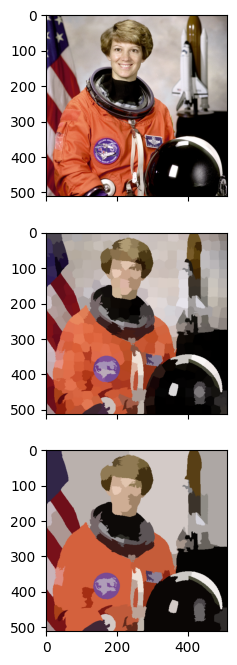

In [7]:
img = data.astronaut()

labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(img)
ax[1].imshow(out1)
ax[2].imshow(out2)

# Ejercicio 3

Utilizando la misma imagen del `Ejercicio 2`, realizar una segementación mediante otro método conocido.

In [12]:
from sklearn.cluster import KMeans

(512, 512, 3)


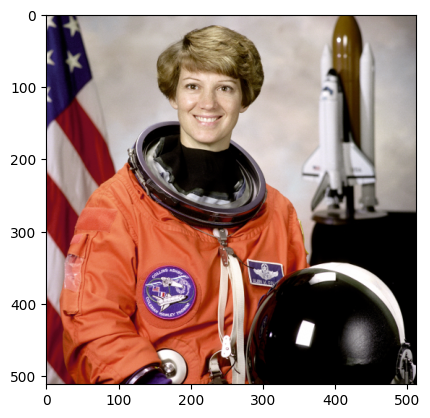

In [13]:
img = data.astronaut()/255
print(img.shape)
plt.imshow(img) #TODO

In [14]:
pic_n = img.reshape(512 * 512, 3) #TODO
pic_n.shape

(262144, 3)

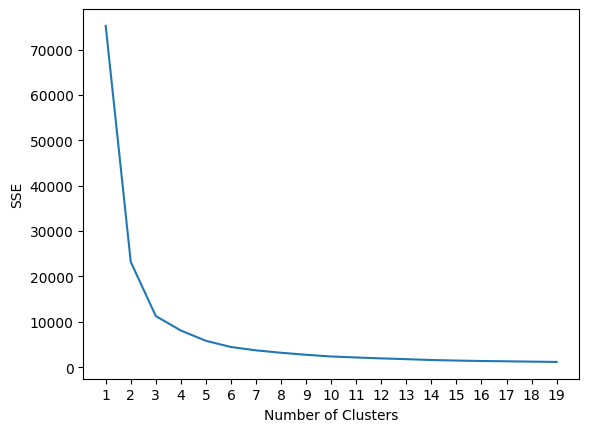

In [19]:
#TODO - Plot del codo
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pic_n)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
# Tomar el valor k resultante del plot anterior.
# Probar otros valores de K para ver su resultado
kmeans = KMeans(n_clusters=3).fit(pic_n) 
pic2show = kmeans.cluster_centers_[kmeans.predict(pic_n)] 

c:\Users\flopa\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


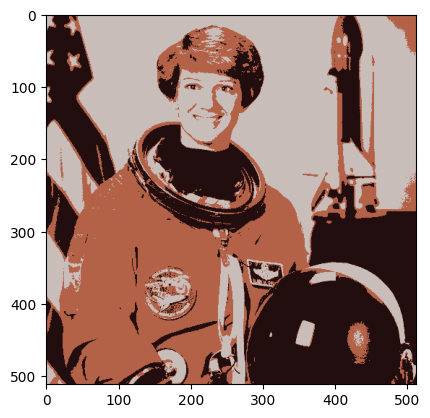

In [21]:
cluster_pic = pic2show.reshape((512, 512, 3)) 
plt.imshow(cluster_pic) 

# Ejercicio 4
Utilizando el dataset de dígitos del `Mnist` realizar una reducción de dimensionalidad utilizando algún método conocido.

In [33]:
#Importing the libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits as LoadData
import pandas as pd
from sklearn.decomposition import PCA

In [34]:
digitos = LoadData()

In [35]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [36]:
features = digitos.data
label = digitos.target
df = pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [37]:
pca = PCA() 
pca.fit(df) 

PCA()

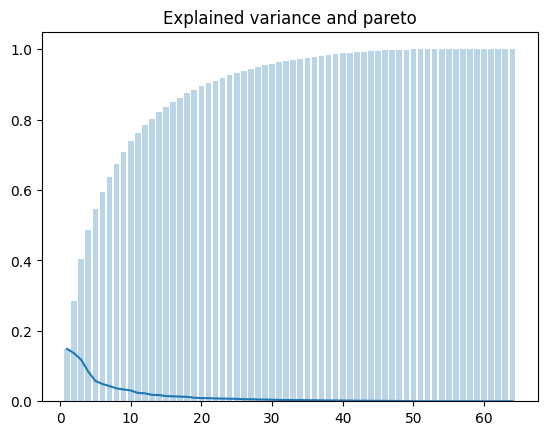

In [40]:
pca=PCA()
pca.fit(df) 
plt.plot(range(1,65),pca.explained_variance_ratio_)
plt.bar(range(1,65),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Explained variance and pareto")
plt.show()

In [45]:
print ('Percentage of variance explained (9 components): ', np.cumsum(pca.explained_variance_ratio_)[8]*100)
print ('Percentage of variance explained (10 components): ', np.cumsum(pca.explained_variance_ratio_)[9]*100)
print ('Percentage of variance explained (11 components): ', np.cumsum(pca.explained_variance_ratio_)[10]*100)
print ('Percentage of variance explained (12 components): ', np.cumsum(pca.explained_variance_ratio_)[11]*100)
print ('Percentage of variance explained (13 components): ', np.cumsum(pca.explained_variance_ratio_)[12]*100)
print ('Percentage of variance explained (14 components): ', np.cumsum(pca.explained_variance_ratio_)[13]*100)
print ('Percentage of variance explained (15 components): ', np.cumsum(pca.explained_variance_ratio_)[14]*100)
print ('Percentage of variance explained (16 components): ', np.cumsum(pca.explained_variance_ratio_)[15]*100)
print ('Percentage of variance explained (17 components): ', np.cumsum(pca.explained_variance_ratio_)[16]*100)
print ('Percentage of variance explained (18 components): ', np.cumsum(pca.explained_variance_ratio_)[17]*100)
print ('Percentage of variance explained (19 components): ', np.cumsum(pca.explained_variance_ratio_)[18]*100)
print ('Percentage of variance explained (20 components): ', np.cumsum(pca.explained_variance_ratio_)[19]*100)
print ('Percentage of variance explained (21 components): ', np.cumsum(pca.explained_variance_ratio_)[20]*100)
print ('Percentage of variance explained (22 components): ', np.cumsum(pca.explained_variance_ratio_)[21]*100)

Percentage of variance explained (9 components):  70.74387067569076
Percentage of variance explained (10 components):  73.82267688459531
Percentage of variance explained (11 components):  76.19501772859842
Percentage of variance explained (12 components):  78.46771429740798
Percentage of variance explained (13 components):  80.28957761040317
Percentage of variance explained (14 components):  82.06343254758508
Percentage of variance explained (15 components):  83.53053364037439
Percentage of variance explained (16 components):  84.9402492419831
Percentage of variance explained (17 components):  86.25883844271051
Percentage of variance explained (18 components):  87.50697626053608
Percentage of variance explained (19 components):  88.52469422085764
Percentage of variance explained (20 components):  89.43031165985262
Percentage of variance explained (21 components):  90.31985012037211
Percentage of variance explained (22 components):  91.11697327690568


[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078804 0.02372331 0.02272652
 0.01821801 0.01773833 0.01466443 0.01409625 0.01318206]


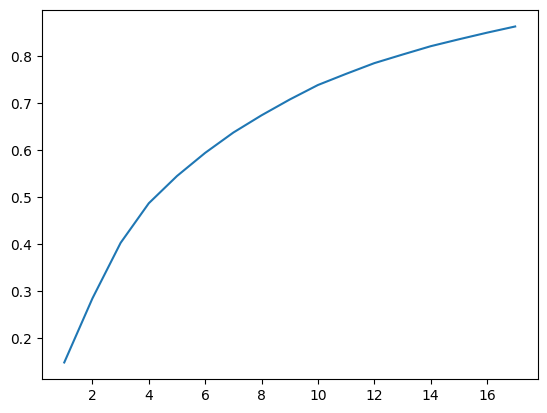

In [47]:
pca=PCA(n_components=17)
pca.fit(df) #TODO
v= pca.explained_variance_ratio_ 
print(v)
plt.plot(np.arange(1,18), np.cumsum(v));

# Ejercicio 5 (Teoría)
Cuál es el objetivo de la siguiente clase y en que tipo de arquitectura/algoritmo se ve implementado. Qué debe retornar como resultado y cúal es el significado de ese valor?

*Respuesta:*

El objetivo de la siguiente clase es obtener un tensor combinado con una muestra aleatoria de la distribución de probabilidad utilizada en VAE. Este tensor representa la muestra de la distribución latente que se utiliza para generar datos nuevos y reconstruir los datos originales durante la etapa de decodificación del VAE.

In [48]:
import tensorflow as tf

In [49]:
class Sampling(tf.keras.layers.Layer):
  def call(self, inputs):
    mu, sigma = inputs
    batch = tf.shape(mu)[0]
    dim = tf.shape(mu)[1]
    epsilon = tf.keras.backend.random_normal(shape = (batch, dim))
    z = mu + tf.exp(0.5 * sigma) * epsilon
    return  z # TODO Qué debe devolver?

AttributeError: module 'tensorflow' has no attribute 'keras'

# Ejercicio 6 (COLAB)

Implemente una `GAN` para el siguiente dataset:

[Link de descarga]()

>Note: (15, 15) Es el tamaño de cada imágen

In [ ]:
# for mathematical operations
import random
import math
import pandas as pd
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for image related operations
import PIL
# for warnings
import zipfile
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing data
data_path = "" # Utilizar el path correspondiente
batch_size = 64 # can use 32 or 128 as well

# tf.keras.preprocessing.image_dataset_from_directory generates a tf.data.Dataset from image files in a directory
data = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                                           label_mode = None,
                                                           image_size = (64,64),
                                                           batch_size = batch_size)

In [ ]:
plt.figure(figsize=(15,15)) # (15, 15) is the size of each image
for images in data.take(1):
    for i in range(30): # display 30 images
        ax = plt.subplot(6, 5, i + 1) # 6 rows, 5 columns for the i+1th image (i starts from 0 hence 1 is added)

        # dataset needs to be first converted to numpy array to be displayed. unit8 has range from 0 to 255 which fits perfectly for our image data, hence this is used
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis("off") # turns off the pixel indicator axis

In [ ]:
latent_dim = 100

# building a generator
generator = Sequential()
generator.add(Dense(4*4*256, activation=, input_dim=)) #TODO
generator.add(Reshape((4,4,256)))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation()) #TODO
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation()) #TODO
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))#
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation()) #TODO
generator.add(UpSampling2D())
generator.add(Conv2D(128,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation()) #TODO
generator.add(Conv2D(3,kernel_size=3,padding="same"))
generator.add(Activation("tanh"))

generator.summary()



In [ ]:
# building the discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25)) # can experiment by removing Dropout layer. I got better performance with it hence using it
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="")) #TODO

discriminator.summary()



In [ ]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))
        # decode them to fake images
        generated_images = self.generator(noise)
        # combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # sample random points in the latent space
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(noise))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
# defining the number of epochs
epochs = #TODO

# the optimizers for generator and discriminator
discriminator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
generator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)

# to compute cross entropy loss
loss_fn = #TODO

# defining GAN model
model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)

# compiling GAN model
model.compile(d_optimizer=discriminator_opt, g_optimizer=generator_opt, loss_fn=loss_fn)

# fitting the GAN
history = model.fit() #TODO

In [ ]:
# number of images to be generated
num_img=30

# a function to generate and save images
def Image_Generator():
    Generated_images = []
    noise = tf.random.normal([num_img, latent_dim])
    generated_image = generator(noise)
    generated_image *= 255
    generated_image = generated_image.numpy()
    for i in range(num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_image[i])
            Generated_images.append(img)
            img.save("image{:02d}.png".format(i))
    return

# generating images
Images = Image_Generator()

In [ ]:
Generated_path = "" #TODO
Images_generated = tf.keras.preprocessing.image_dataset_from_directory(Generated_path, label_mode = None)

In [ ]:
plt.figure(figsize=(15,15))
for images in Images_generated.take(1):
    for i in range(30):
        ax = plt.subplot(5, 6, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis("off")